<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [36]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scipy

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 184.8 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [6]:
## Write your code here
critical_cols = ["Employment", "JobSat", "RemoteWork"]
print(df[critical_cols].isna().sum())
##Employment
employment_mode = df["Employment"].mode()[0]
df["Employment_Imputed"] = df["Employment"].fillna(employment_mode)
##RemoteWork
remote_mode = df["RemoteWork"].mode()[0]
##print("Remote mode",remote_mode)
df["RemoteWork_Imputed"] = df["RemoteWork"].fillna(remote_mode)
##JobSat--Impute is not done on JobSat value as it might affect the analysis if NaN values are dropped or changed-drop missing rows (only where needed)
df_jobsat_clean = df.dropna(subset=["JobSat"])
df[["Employment", "Employment_Imputed",
    "RemoteWork", "RemoteWork_Imputed"]].isna().sum()

Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64
Remote mode Hybrid (some remote, some in-person)


Employment                0
Employment_Imputed        0
RemoteWork            10631
RemoteWork_Imputed        0
dtype: int64

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


ExperienceRange
0–5      7.0
5–10     7.0
10–20    7.0
20+      8.0
Name: JobSat, dtype: float64


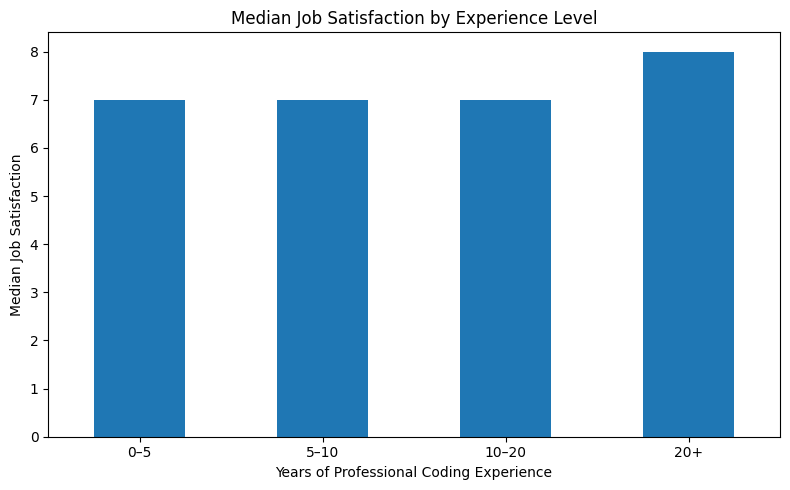

In [12]:
## Write your code here
# Convert YearsCodePro to numeric
df["YearsCodePro_Num"] = (
    df["YearsCodePro"]
    .replace({
        "Less than 1 year": 0.5,
        "More than 50 years": 50
    })
)
df["YearsCodePro_Num"] = pd.to_numeric(
    df["YearsCodePro_Num"],
    errors="coerce"
)

##Drop any null values in exp_sat columns
df_exp_sat = df.dropna(
    subset=["YearsCodePro_Num", "JobSat"]
).copy()
##Creating experience range data
df_exp_sat["ExperienceRange"] = pd.cut(
    df_exp_sat["YearsCodePro_Num"],
    bins=[0, 5, 10, 20, np.inf],
    labels=["0–5", "5–10", "10–20", "20+"],
    right=False
)

##Summarize YearsProCode
df_exp_sat["YearsCodePro_Num"].describe()

##Median Job Sat for each experience range
median_jobsat = (
    df_exp_sat
    .groupby("ExperienceRange", observed=True)["JobSat"]
    .median()
)

print(median_jobsat)

median_jobsat.plot(
    kind="bar",
    figsize=(8, 5)
)

plt.title("Median Job Satisfaction by Experience Level")
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Median Job Satisfaction")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


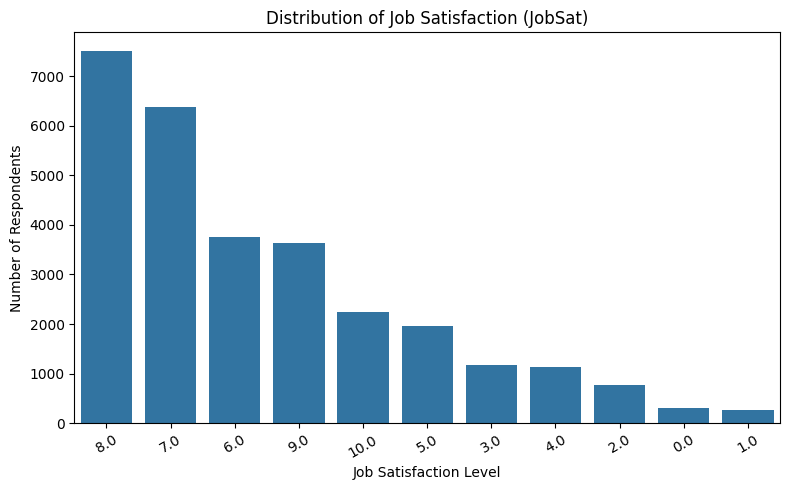

In [13]:
## Write your code here
plt.figure(figsize=(8, 5))

sns.countplot(
    data=df,
    x="JobSat",
    order=df["JobSat"].value_counts().index
)

plt.title("Distribution of Job Satisfaction (JobSat)")
plt.xlabel("Job Satisfaction Level")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


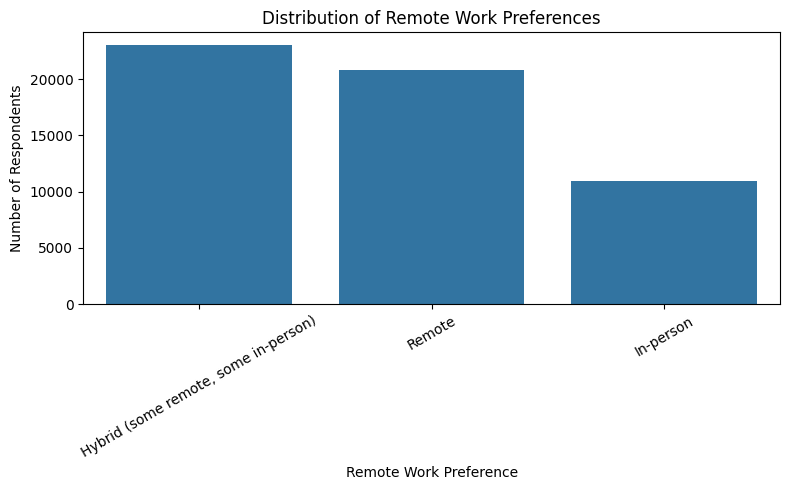

RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                                17281   
Employed, full-time;Employed, part-time                                               85   
Employed, full-time;Independent contractor, fre...                                  1330   
Employed, full-time;Independent contractor, fre...                                    80   
Employed, full-time;Independent contractor, fre...                                     0   
...                                                                                  ...   
Student, full-time;Not employed, but looking fo...                                     1   
Student, full-time;Not employed, but looking fo...                                     2   
Student, full-time;Not employed, but looking fo...                              

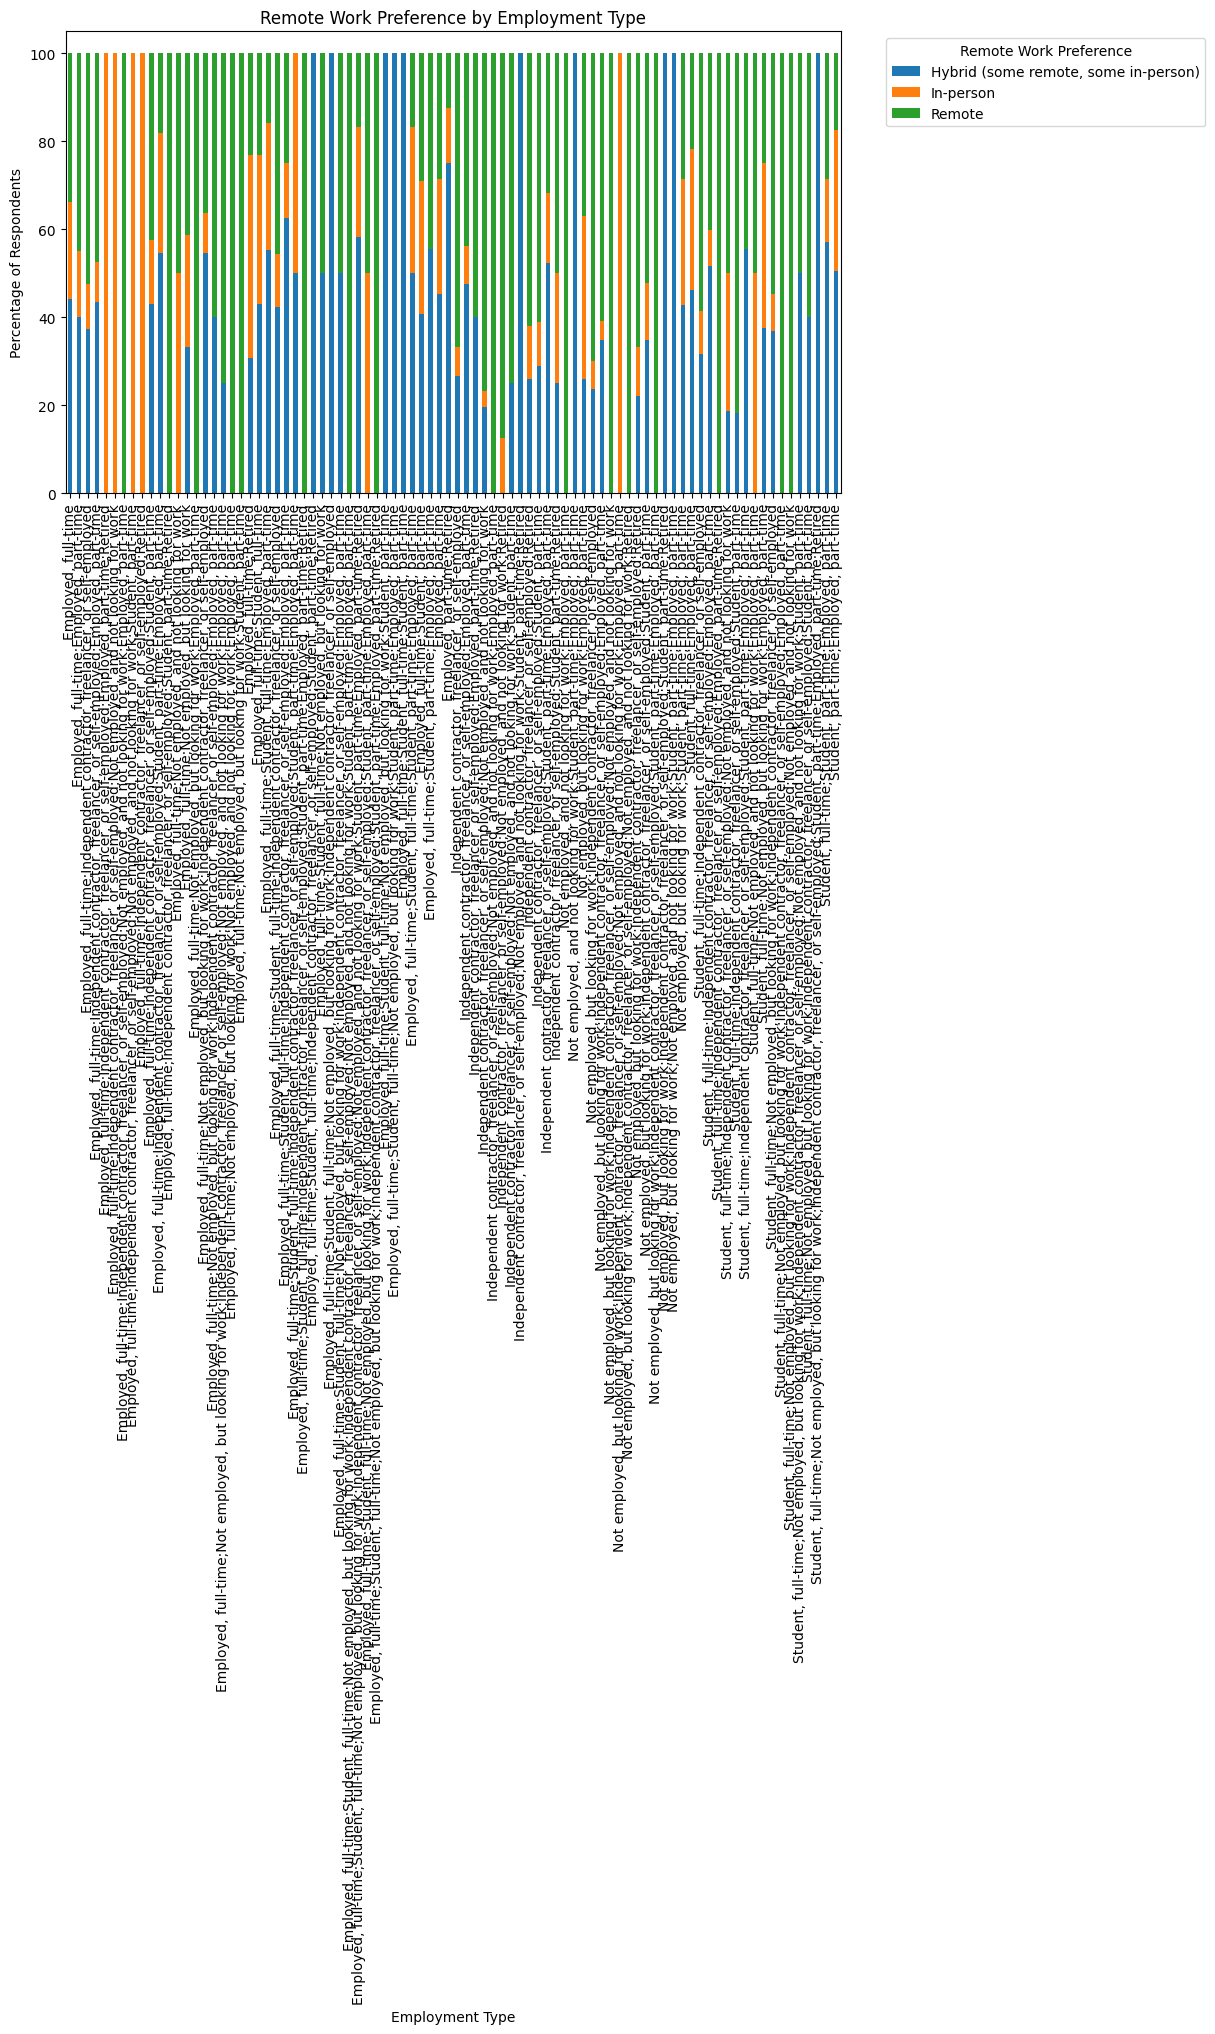

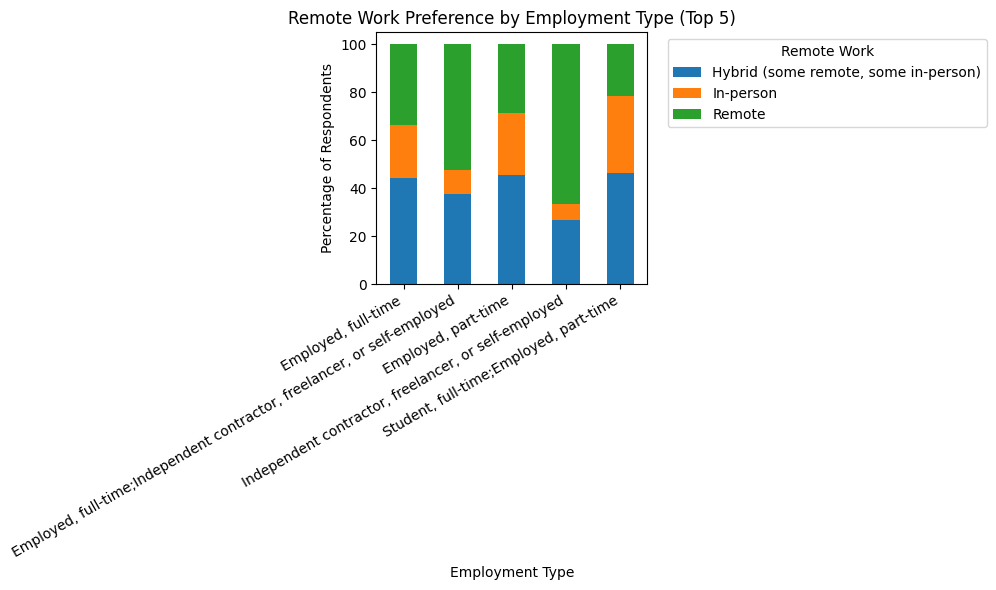

In [20]:
## Write your code here
##Preparing the data
df_rw = df.dropna(subset=["RemoteWork", "Employment"])
##Visualizing overall remote work distribution
plt.figure(figsize=(8, 5))
sns.countplot(
    data=df_rw,
    x="RemoteWork",
    order=df_rw["RemoteWork"].value_counts().index
)
plt.title("Distribution of Remote Work Preferences")
plt.xlabel("Remote Work Preference")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()
##Cross-tabulating remote work by employment type
remote_by_employment = pd.crosstab(
    df_rw["Employment"],
    df_rw["RemoteWork"]
)

print(remote_by_employment)

remote_by_employment_pct = pd.crosstab(
    df_rw["Employment"],
    df_rw["RemoteWork"],
    normalize="index"
) * 100

remote_by_employment_pct.round(2)

remote_by_employment_pct.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6)
)

plt.title("Remote Work Preference by Employment Type")
plt.xlabel("Employment Type")
plt.ylabel("Percentage of Respondents")
plt.legend(title="Remote Work Preference", bbox_to_anchor=(1.05, 1))
##plt.tight_layout()
plt.show()
##Interpreting the results
##For top 5 Employment categories only
top_employment = df_rw["Employment"].value_counts().head(5).index
df_rw_top = df_rw[df_rw["Employment"].isin(top_employment)]
remote_by_emp_pct = pd.crosstab(
    df_rw_top["Employment"],
    df_rw_top["RemoteWork"],
    normalize="index"
) * 100

remote_by_emp_pct.plot(
    kind="bar",
    stacked=True,
    figsize=(9, 6)
)

plt.title("Remote Work Preference by Employment Type (Top 5)")
plt.xlabel("Employment Type")
plt.ylabel("Percentage of Respondents")
plt.xticks(rotation=30, ha="right")
plt.legend(title="Remote Work", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

##Typical patterns observed:
##Full-time employees show higher preference for hybrid or remote
##Part-time or contract roles may lean more on-site
##Some roles show strong polarization (mostly remote or mostly on-sit

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


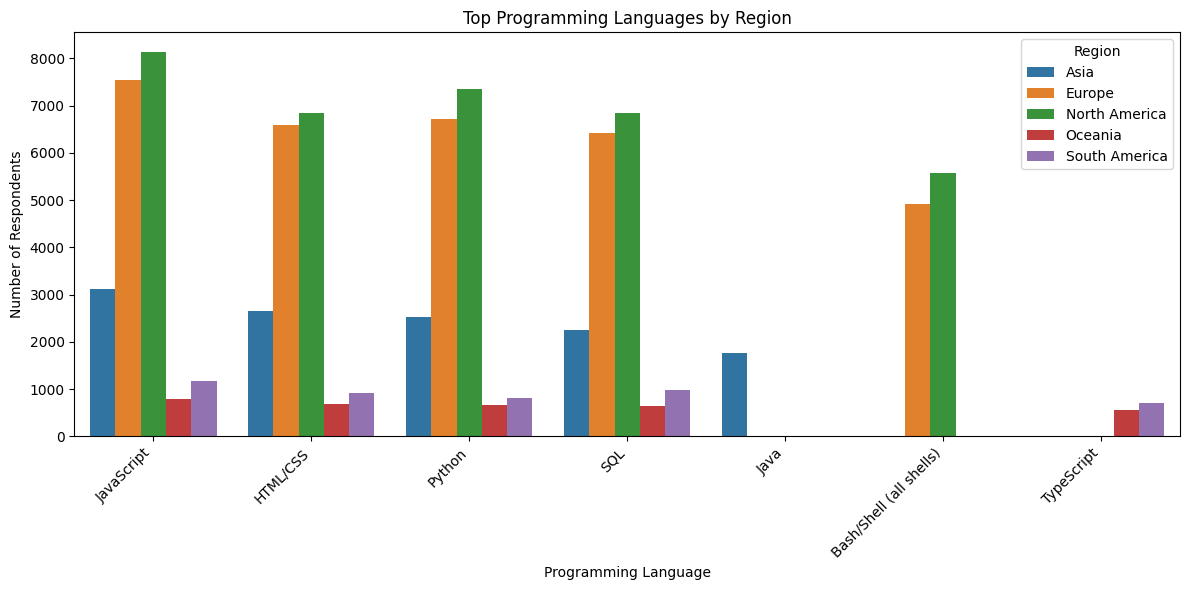

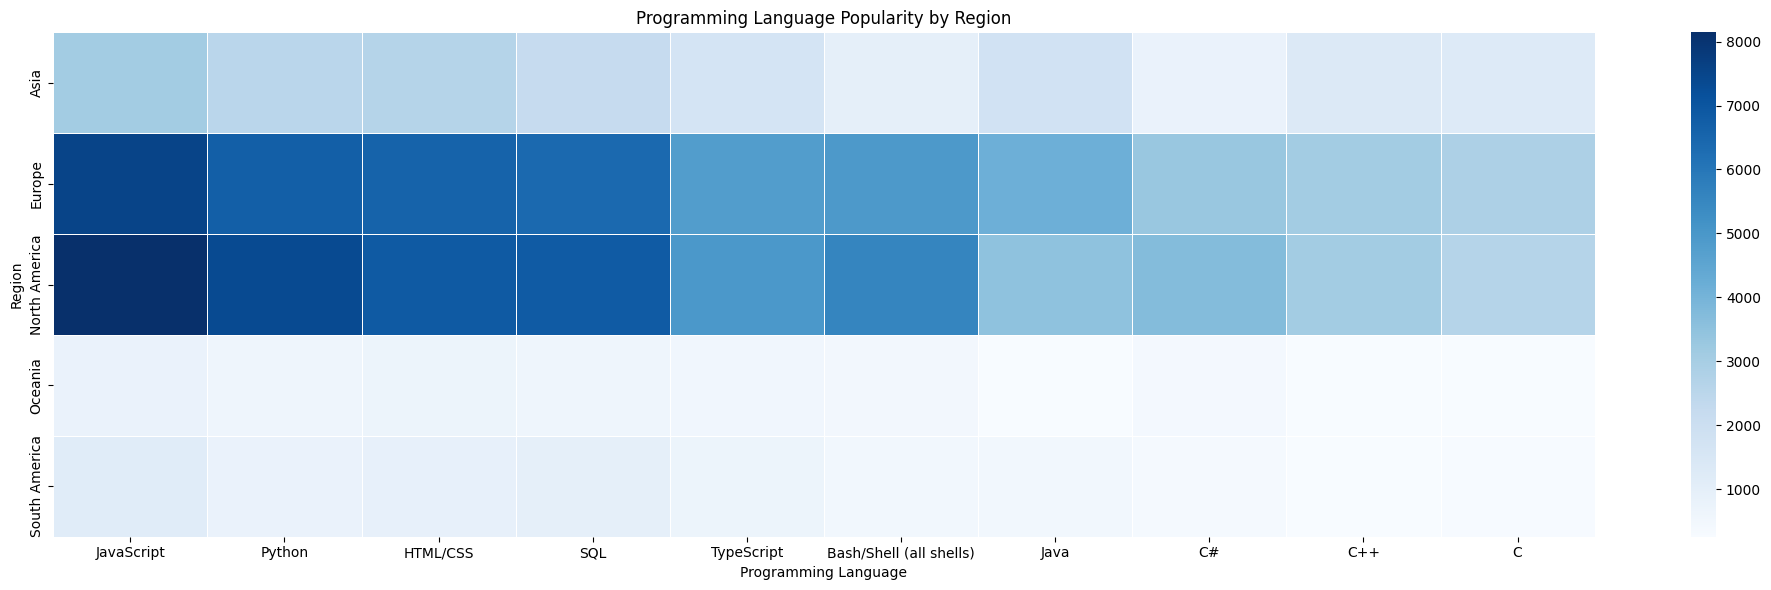

In [22]:
## Write your code here
##Drop missing values of count and languagehaveworkedwith:
df_lang = df[["Country", "LanguageHaveWorkedWith"]].dropna()
##Define region
region_map = {
    "United States of America": "North America",
    "Canada": "North America",
    "United Kingdom of Great Britain and Northern Ireland": "Europe",
    "Germany": "Europe",
    "France": "Europe",
    "Spain": "Europe",
    "Italy": "Europe",
    "India": "Asia",
    "China": "Asia",
    "Japan": "Asia",
    "Brazil": "South America",
    "Argentina": "South America",
    "Australia": "Oceania"
}
df_lang["Region"] = df_lang["Country"].map(region_map)
df_lang = df_lang.dropna(subset=["Region"])
##Each respondent may list multiple languages, so we must split and explode.
df_lang["LanguageHaveWorkedWith"] = (
    df_lang["LanguageHaveWorkedWith"].str.split(";")
)

df_lang = df_lang.explode("LanguageHaveWorkedWith")
##Top programming language by region
top_langs = (
    df_lang
    .groupby(["Region", "LanguageHaveWorkedWith"])
    .size()
    .reset_index(name="Count")
)

top_langs = (
    top_langs
    .sort_values(["Region", "Count"], ascending=[True, False])
    .groupby("Region")
    .head(5)
)
##Bar plot
plt.figure(figsize=(12, 6))

sns.barplot(
    data=top_langs,
    x="LanguageHaveWorkedWith",
    y="Count",
    hue="Region"
)

plt.title("Top Programming Languages by Region")
plt.xlabel("Programming Language")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

##Heat Map 
heatmap_data = (
    df_lang
    .groupby(["Region", "LanguageHaveWorkedWith"])
    .size()
    .unstack(fill_value=0)
)
top_10_languages = (
    df_lang["LanguageHaveWorkedWith"]
    .value_counts()
    .head(10)
    .index
)

heatmap_data = heatmap_data[top_10_languages]
plt.figure(figsize=(20, 6))

sns.heatmap(
    heatmap_data,
    cmap="Blues",
    linewidths=0.5
)

plt.title("Programming Language Popularity by Region")
plt.xlabel("Programming Language")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

##Typical insights Observed:
##Python and JavaScript dominate across most regions
##Java may be stronger in Asia
##C/C++ usage may be higher in certain regions
##Regional preferences reflect industry focus and education

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


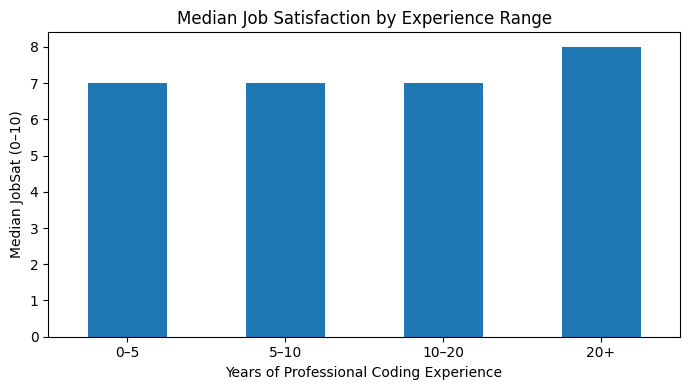

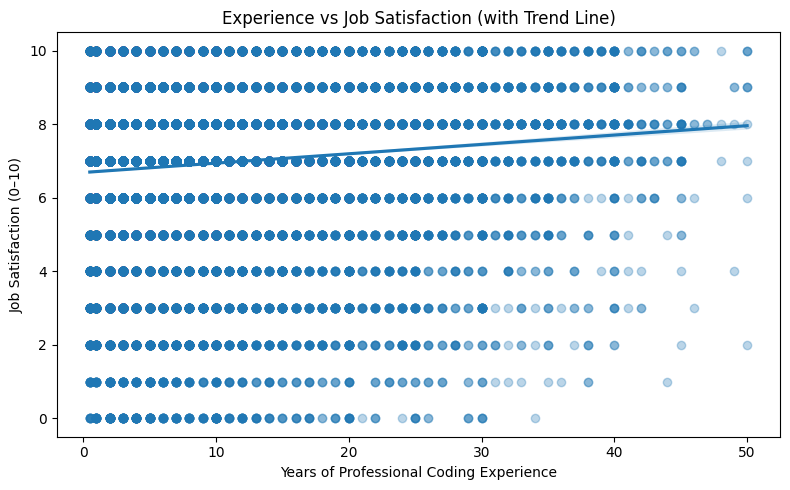

In [44]:
## Write your code here
##Prepare data - Convert YearsCodePro to numeric
df["YearsCodePro_Num"] = (
    df["YearsCodePro"]
    .replace({
        "Less than 1 year": 0.5,
        "More than 50 years": 50
    })
)

df["YearsCodePro_Num"] = pd.to_numeric(
    df["YearsCodePro_Num"], errors="coerce"
)
##Convert JobSat to numeric (ordinal encoding) JobSat is ordered (e.g., Very dissatisfied → Very satisfied).
df["JobSat_Num"] = pd.to_numeric(df["JobSat"], errors="coerce")
df["YearsCodePro_Num"] = (
    df["YearsCodePro"]
    .replace({"Less than 1 year": 0.5, "More than 50 years": 50})
)
df["YearsCodePro_Num"] = pd.to_numeric(df["YearsCodePro_Num"], errors="coerce")
df_corr = df.dropna(subset=["YearsCodePro_Num", "JobSat_Num"])
corr_value = df_corr["YearsCodePro_Num"].corr(df_corr["JobSat_Num"], method="spearman")
corr_value
df_exp_sat = df.dropna(subset=["YearsCodePro_Num", "JobSat_Num"]).copy()

df_exp_sat["ExperienceRange"] = pd.cut(
    df_exp_sat["YearsCodePro_Num"],
    bins=[0, 5, 10, 20, np.inf],
    labels=["0–5", "5–10", "10–20", "20+"],
    right=False
)

median_jobsat = (
    df_exp_sat
    .groupby("ExperienceRange", observed=True)["JobSat_Num"]
    .median()
)

median_jobsat

median_jobsat.plot(kind="bar", figsize=(7, 4))
plt.title("Median Job Satisfaction by Experience Range")
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Median JobSat (0–10)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
df_plot = df.dropna(subset=["YearsCodePro_Num", "JobSat_Num"])
##Scatter plot
plt.figure(figsize=(8, 5))

sns.regplot(
    x="YearsCodePro_Num",
    y="JobSat_Num",
    data=df_plot,
    scatter_kws={"alpha": 0.3},
)

plt.title("Experience vs Job Satisfaction (with Trend Line)")
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Job Satisfaction (0–10)")
plt.tight_layout()
plt.show()
##Interpretation
##Wide spread of satisfaction at all experience levels
##Slight upward trend with experience
##Indicates experience alone weakly correlates with satisfaction

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


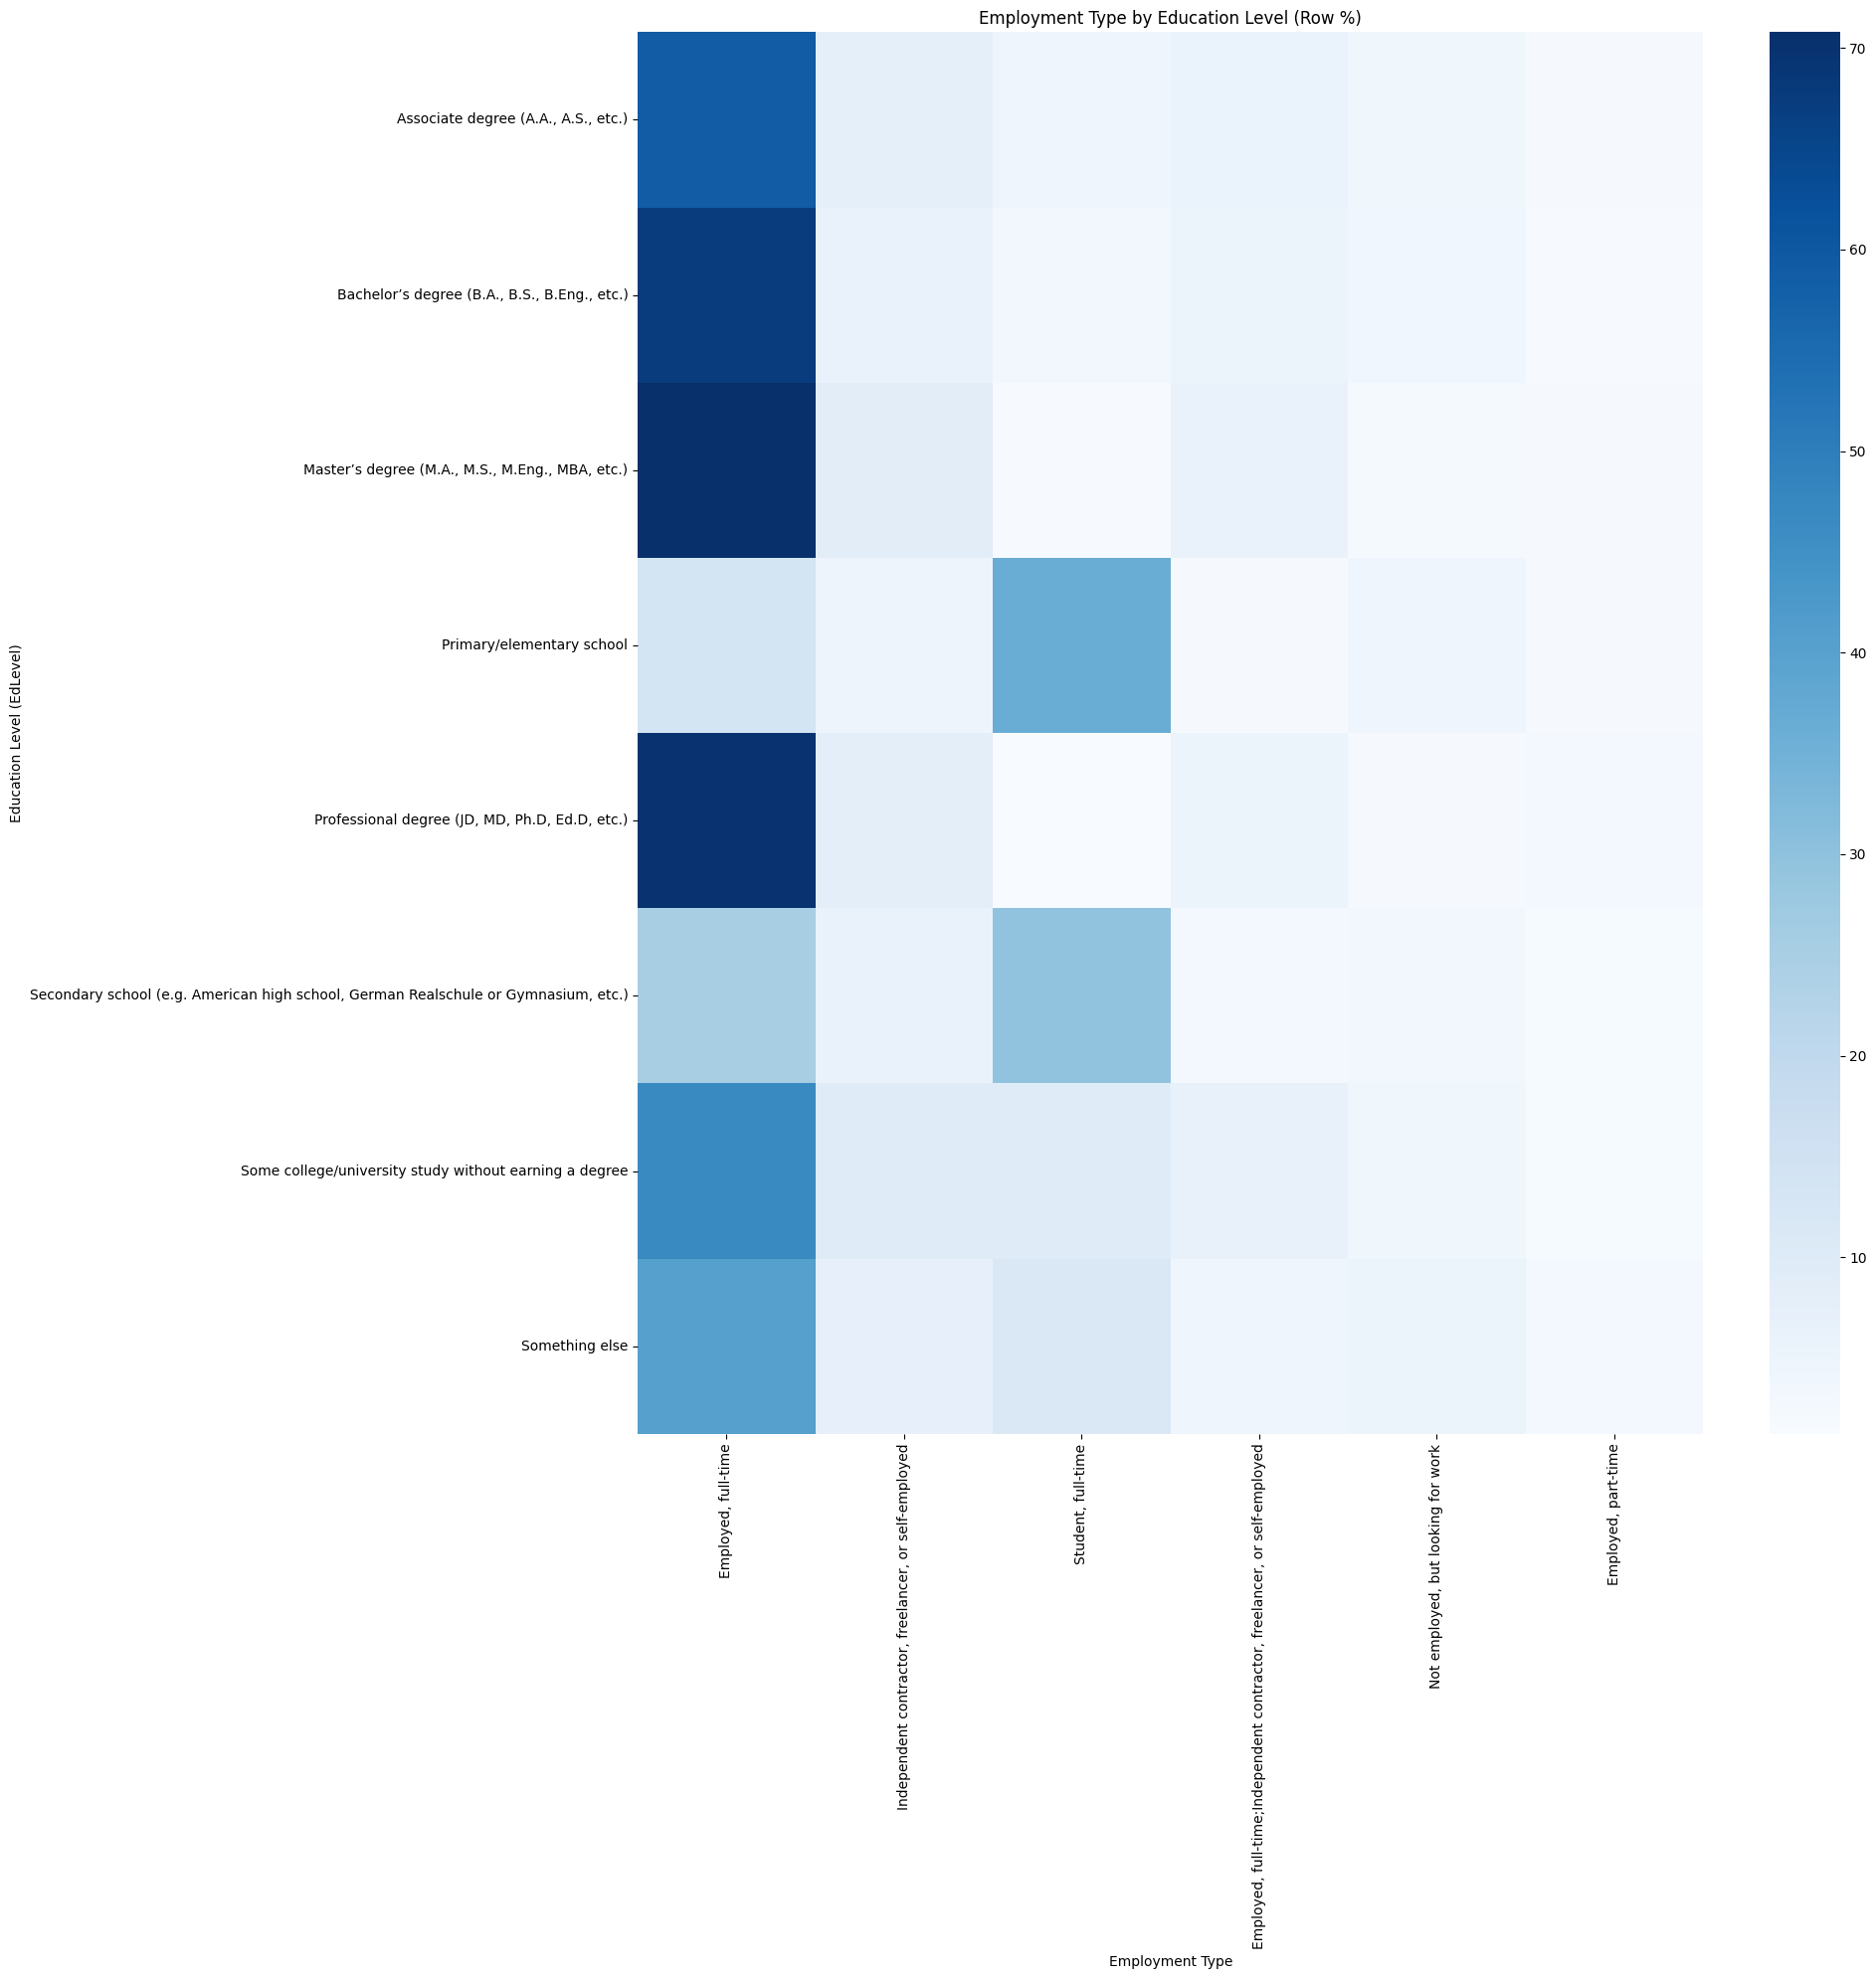

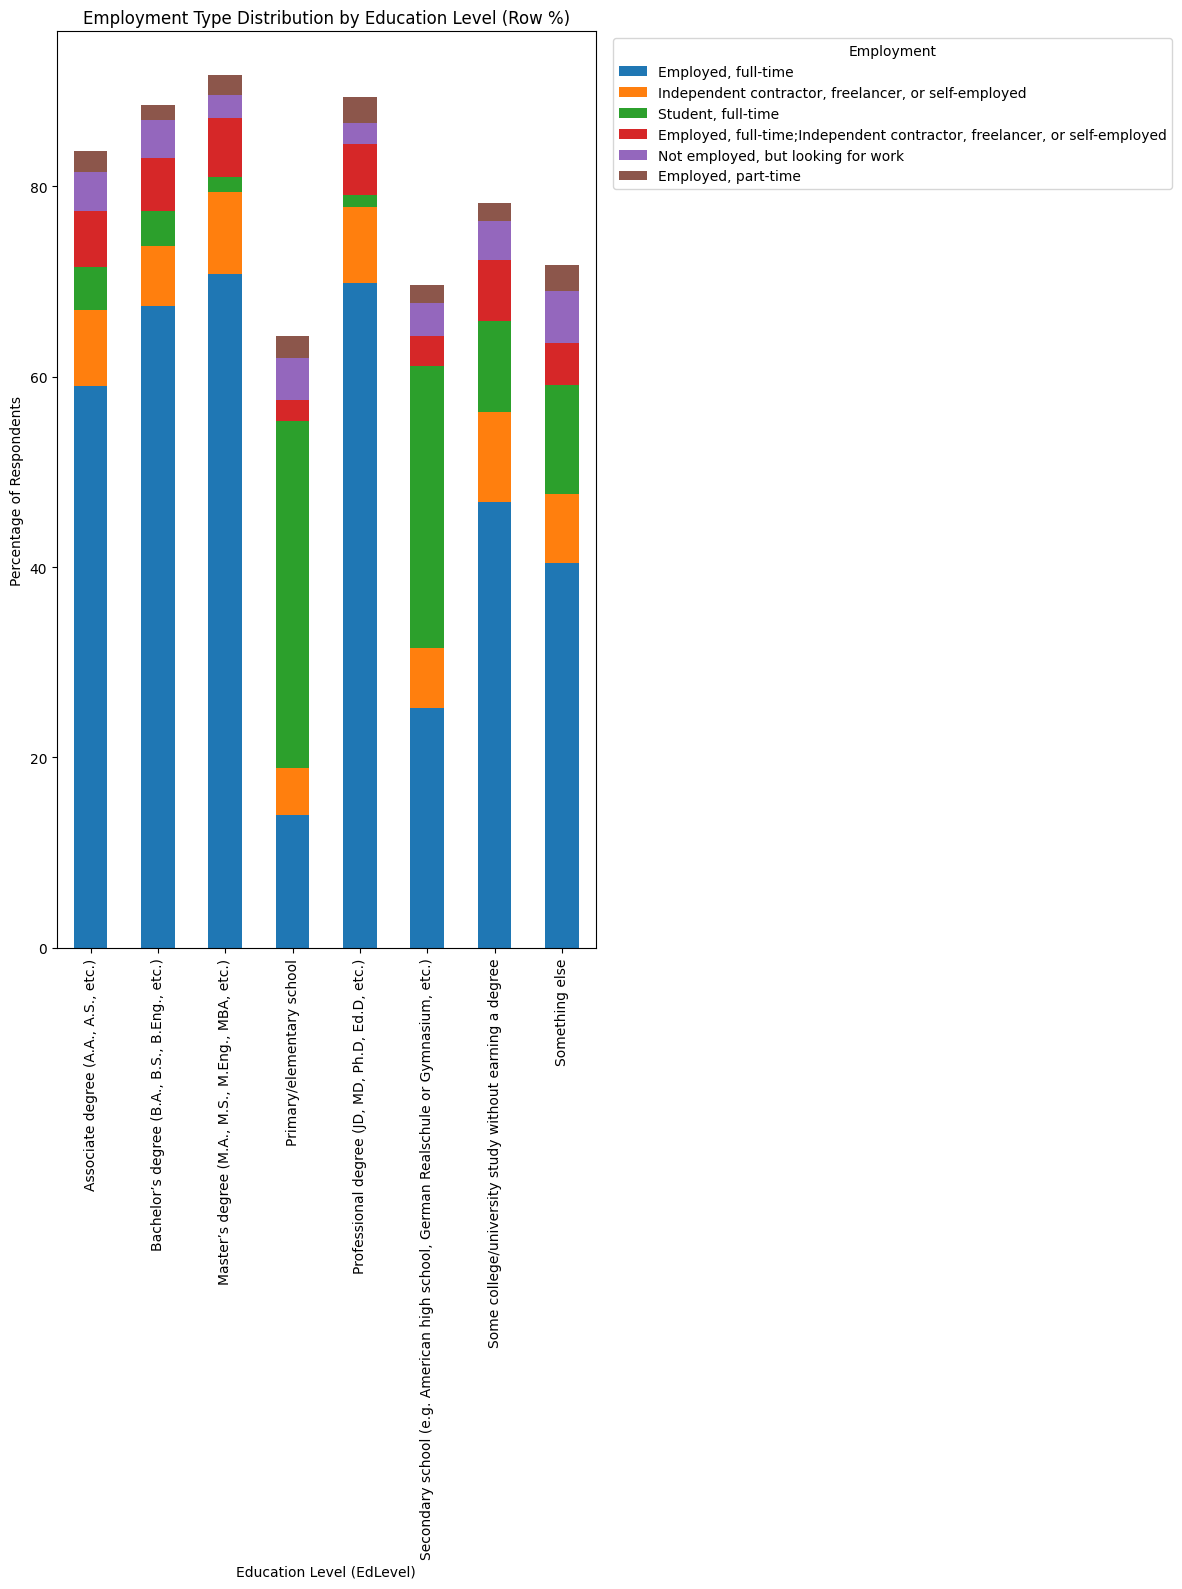

In [55]:
## Write your code here
df_edu_emp = df[["EdLevel", "Employment"]].dropna()
##raw counts of employment types for each education level.

df[["EdLevel", "Employment"]].isna().sum()
edu_emp_ct = pd.crosstab(df_edu_emp["EdLevel"], df_edu_emp["Employment"])
edu_emp_ct

##Normalize - Raw counts can be misleading because some education groups are larger. Percentages make comparisons fair
edu_emp_pct = pd.crosstab(
    df_edu_emp["EdLevel"],
    df_edu_emp["Employment"],
    normalize="index"
) * 100

edu_emp_pct.round(2)

top_emp = df_edu_emp["Employment"].value_counts().head(6).index
edu_emp_pct_top = edu_emp_pct[top_emp]
edu_emp_pct_top

##Heat map 
plt.figure(figsize=(20, 20))
sns.heatmap(edu_emp_pct_top, annot=False, cmap="Blues")

plt.title("Employment Type by Education Level (Row %)")
plt.xlabel("Employment Type")
plt.ylabel("Education Level (EdLevel)")
plt.tight_layout()
plt.show()
##Stacked barchart
edu_emp_pct_top.plot(kind="bar", stacked=True, figsize=(12, 16))

plt.title("Employment Type Distribution by Education Level (Row %)")
plt.xlabel("Education Level (EdLevel)")
plt.ylabel("Percentage of Respondents")
plt.legend(title="Employment", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

##Higher EdLevels showing more full-time employment
##Some EdLevels having more students / part-time / unemployed
##Differences in freelance/self-employed rates

##A cross-tabulation between EdLevel and Employment was computed using both counts and row-normalized percentages. 
##Visualizations (heatmap/stacked bar chart) show how employment distributions vary by education level. Patterns suggest that higher education levels tend to 
##have a larger share of full-time employment, while lower or in-progress education levels show higher proportions of student and part-time categories.

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [57]:
## Write your code here 
##Create a copy of the original to make all the updates and export to store for future reference
df_master = df.copy()
##cleaned numeric columns
df_master["YearsCodePro_Num"] = (
    df_master["YearsCodePro"]
    .replace({
        "Less than 1 year": 0.5,
        "More than 50 years": 50
    })
)

df_master["YearsCodePro_Num"] = pd.to_numeric(
    df_master["YearsCodePro_Num"], errors="coerce"
)

df_master["JobSat_Num"] = pd.to_numeric(
    df_master["JobSat"], errors="coerce"
)
##experience ranges
df_master["ExperienceRange"] = pd.cut(
    df_master["YearsCodePro_Num"],
    bins=[0, 5, 10, 20, np.inf],
    labels=["0–5", "5–10", "10–20", "20+"],
    right=False
)
##imputed categorical columns
df_master["Employment_Imputed"] = df_master["Employment"].fillna(
    df_master["Employment"].mode()[0]
)

df_master["RemoteWork_Imputed"] = df_master["RemoteWork"].fillna(
    df_master["RemoteWork"].mode()[0]
)
##Create derived DataFrames ONLY for analysis - These are views for specific tasks, not permanent storage.
##Experience vs Satisfaction
df_exp_sat = df_master.dropna(
    subset=["YearsCodePro_Num", "JobSat_Num"]
).copy()

##Education vs Employment
df_edu_emp = df_master.dropna(
    subset=["EdLevel", "Employment_Imputed"]
).copy()

##Remote Work analysis
df_remote = df_master.dropna(
    subset=["RemoteWork_Imputed", "Employment_Imputed"]
).copy()

##Language / Region analysis
df_lang = df_master[["Country", "LanguageHaveWorkedWith"]].dropna().copy()

##Save to CSV
df_master.to_csv("survey_data_cleaned_final.csv", index=False)

##Save to Excel
##df_master.to_excel("survey_data_cleaned_final.xlsx", index=False)

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
